IMPORTING MODULES

In [29]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
#Suppress warning messages

import warnings
warnings.filterwarnings('ignore')

READING DATA

In [31]:
os.chdir(r"C:\Users\CC\Downloads")
hr_data=pd.read_csv('People Charm case.csv') 
print(hr_data) 

       satisfactoryLevel  lastEvaluation  numberOfProjects  avgMonthlyHours  \
0                   0.38            0.53                 2              157   
1                   0.80            0.86                 5              262   
2                   0.11            0.88                 7              272   
3                   0.37            0.52                 2              159   
4                   0.41            0.50                 2              153   
...                  ...             ...               ...              ...   
14994               0.11            0.85                 7              275   
14995               0.99            0.83                 4              274   
14996               0.72            0.72                 4              175   
14997               0.24            0.91                 5              177   
14998               0.77            0.83                 6              271   

       timeSpent.company  workAccident  left  promo

EXPLORING THE DATA

In [32]:
hr_data

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


CHECKING FOR DUPLICATES OR NULL VALUES

In [33]:
# Observing the summarized information of data

hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [34]:
# Finding how many missing values are there for each column

hr_data.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

The above steps imply that there are no Null Values

In [35]:
hr_data.duplicated().sum()

3008

It is found that the data has 3008 records which are duplicates, which accounts to 20% of the entire data

In [36]:
hr_data.drop_duplicates(inplace=True)

We are retaining one record and dropping all other duplicates to avoid Overfitting of the Model

In [37]:
hr_data.shape

(11991, 10)

In [38]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      11991 non-null  float64
 1   lastEvaluation         11991 non-null  float64
 2   numberOfProjects       11991 non-null  int64  
 3   avgMonthlyHours        11991 non-null  int64  
 4   timeSpent.company      11991 non-null  int64  
 5   workAccident           11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotionInLast5years  11991 non-null  int64  
 8   dept                   11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [39]:
# Looking at the descriptive statistics of the data

hr_data.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [40]:
# for categorical variables

hr_data.describe(include ="O")

,dept,salary
count,11991,11991
unique,10,3
top,sales,low
freq,3239,5740


In [41]:
# Finding unique values for each column

hr_data.nunique()

satisfactoryLevel         92
lastEvaluation            65
numberOfProjects           6
avgMonthlyHours          215
timeSpent.company          8
workAccident               2
left                       2
promotionInLast5years      2
dept                      10
salary                     3
dtype: int64

# Exploratory data analysis

In [42]:
# summarize the class distribution

from collections import Counter
target = hr_data.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=low, Count=5740, Percentage=47.869%
Class=medium, Count=5261, Percentage=43.875%
Class=high, Count=990, Percentage=8.256%


<AxesSubplot:xlabel='salary'>

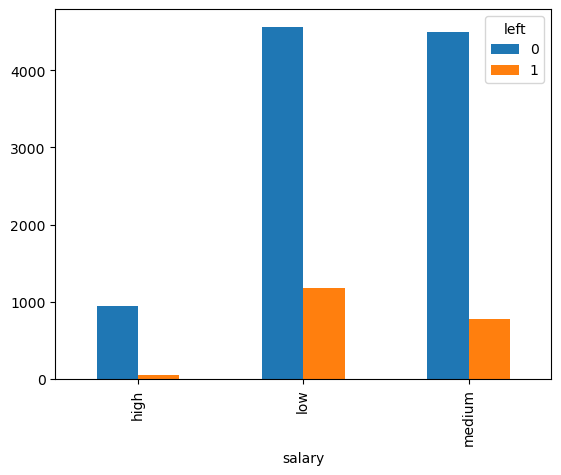

In [43]:
pd.crosstab(hr_data.salary, hr_data.left).plot(kind='bar')

From this plot we can notice that those with low salary leave the company the most compared to those with medium and high salaries

<AxesSubplot:xlabel='dept'>

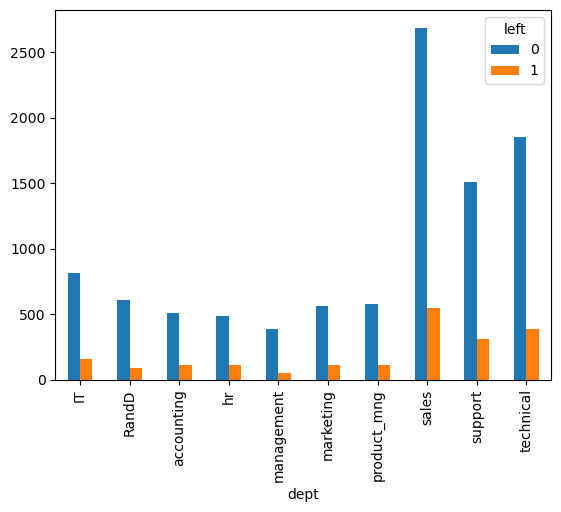

In [44]:
pd.crosstab(hr_data.dept, hr_data.left).plot(kind='bar')

From this plot we can notice that those in sales dept leave the company the most whereas those in management leave the least 

In [45]:
table = hr_data.pivot_table(values='satisfactoryLevel', index='dept', columns='salary', aggfunc=np.count_nonzero)
table

salary,high,low,medium
dept,,,
IT,71,476,429
RandD,47,322,325
accounting,63,296,262
hr,38,296,267
management,128,139,169
marketing,62,310,301
product_mng,52,343,291
sales,237,1553,1449
support,126,867,828


In [46]:
numeric_var_names=[key for key in dict(hr_data.dtypes) if dict(hr_data.dtypes)[key] in ['float64', 'int64']]

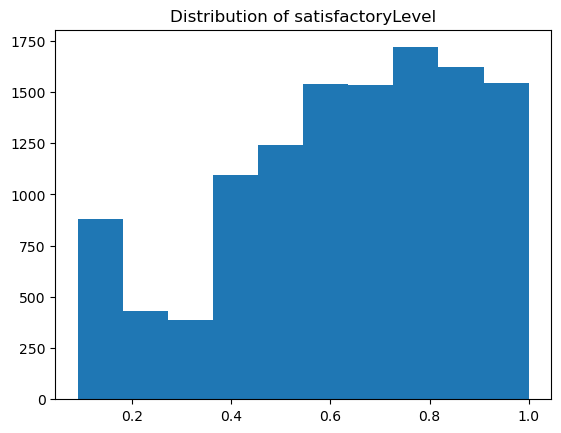

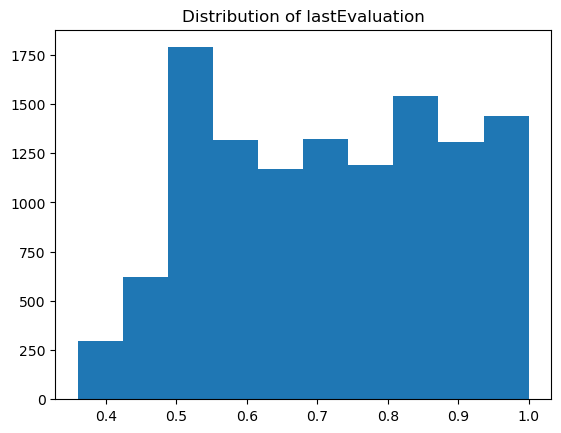

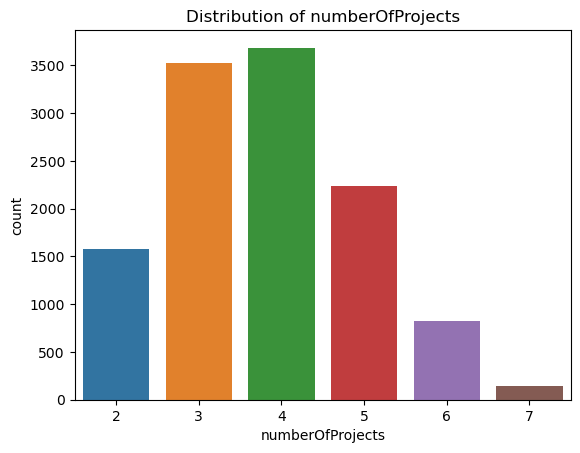

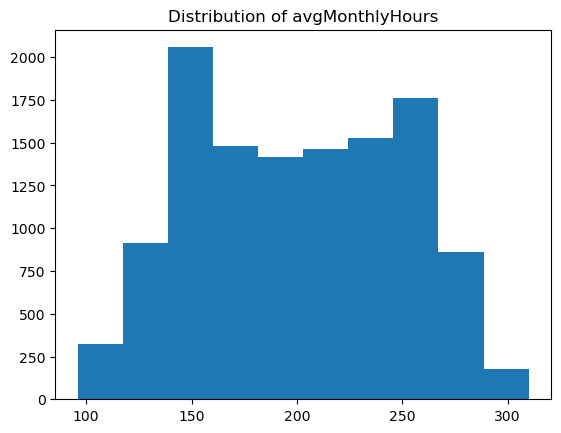

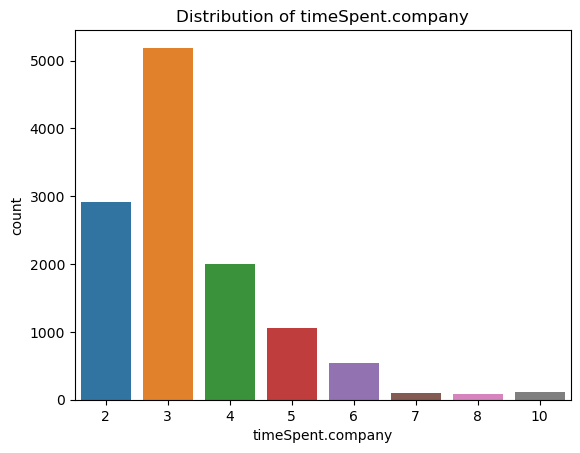

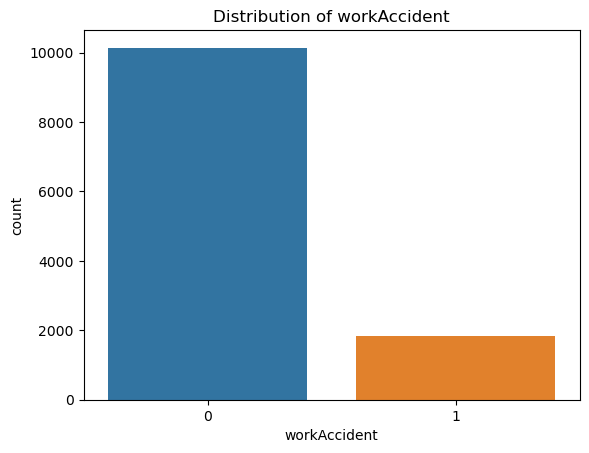

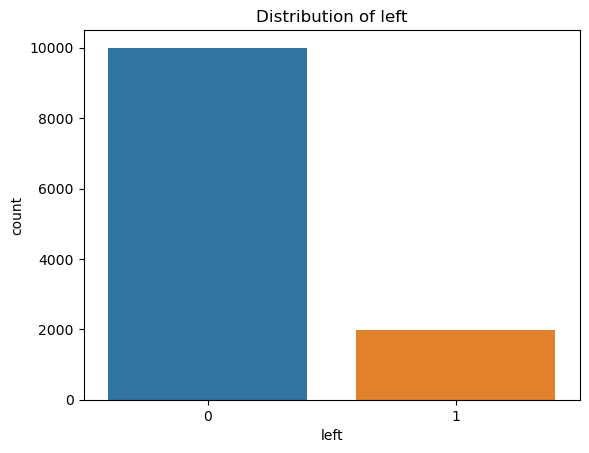

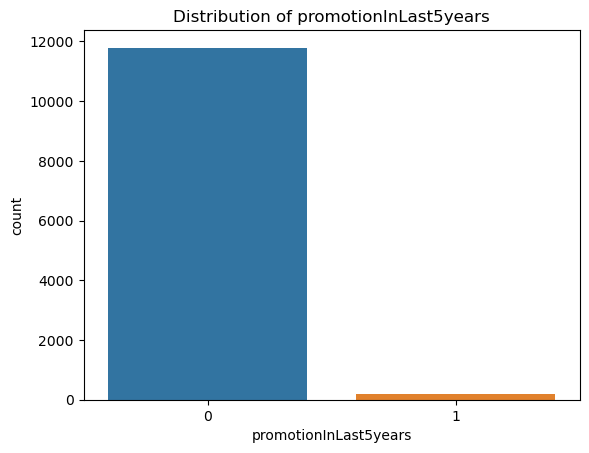

In [47]:
# Univariate Analysis
for num_variable in numeric_var_names:
    if (num_variable=='satisfactoryLevel') or (num_variable=='lastEvaluation') or (num_variable=='avgMonthlyHours'):
        plt.hist(hr_data[num_variable])
    else:
        sns.countplot(hr_data[num_variable])
    plt.title(str('Distribution of ') + str(num_variable))
    plt.show()

Note:
    
    
Employees mostly spend 3 yrs in this company before leaving the company.

There has not been many work accidents in the company which is a good thing.

We can see that promotion over the last 5 years are very less.

The target variable ('left') is not balanced between its classes (0 and 1).


In [48]:
hr_data.skew()

satisfactoryLevel       -0.538702
lastEvaluation          -0.031686
numberOfProjects         0.332152
avgMonthlyHours          0.027208
timeSpent.company        1.816577
workAccident             1.914410
left                     1.795135
promotionInLast5years    7.490008
dtype: float64

It is observed that the columns - timeSpent.company, workAccident, left & promotionInLast5years are skewed.


Since all the above mentioned columns are Right Skewed, Square-Root, Log Transformations are applied

# Data Transformation

In [49]:
#Transformations on promotionINLast5years Column:

hr_data['promotionInLast5years1']=np.sqrt(hr_data['promotionInLast5years']) #Square-Root Transformation

hr_data['promotionInLast5years2']=np.log(hr_data['promotionInLast5years']) #Log Transformation

In [50]:
#Transformations on timeSpent.company Column:

hr_data['timeSpent.company1']=np.sqrt(hr_data['timeSpent.company'])  #Square-Root Transformation

hr_data['timeSpent.company2']=np.log(hr_data['timeSpent.company'])   #Log Transformation

In [51]:
#Transformations on workAccident Column:

hr_data['workAccident1']=np.sqrt(hr_data['workAccident']) #Square-Root Transformation

hr_data['workAccident2']=np.log(hr_data['workAccident']) #Log Transformation

In [52]:
#Transformations on left Column: 

hr_data['left1']=np.sqrt(hr_data['left'])    #Square-Root Transformation

hr_data['left2']=np.log(hr_data['left'])    #Log Transformation

In [53]:
hr_data.skew()

satisfactoryLevel        -0.538702
lastEvaluation           -0.031686
numberOfProjects          0.332152
avgMonthlyHours           0.027208
timeSpent.company         1.816577
workAccident              1.914410
left                      1.795135
promotionInLast5years     7.490008
promotionInLast5years1    7.490008
promotionInLast5years2         NaN
timeSpent.company1        1.104233
timeSpent.company2        0.545446
workAccident1             1.914410
workAccident2                  NaN
left1                     1.795135
left2                          NaN
dtype: float64

From the above Transformations, we can the infer the following:
    
    
1. For the columns 'promotionInLast5years' , 'workAccident', 'left' the square-root transformation is making no difference on the skewness


2. For the columns 'promotionInLast5years' , 'workAccident', 'left' the log transformation is giving a NaN value because of the 0's present in the data


3. For 'timeSpent.company' we choose to use the column of Log Transformation as the skewness is considerably reduced.

# Encoding data

In [54]:
#Label Encoding the Data

from sklearn.preprocessing import LabelEncoder
x1=LabelEncoder()                                       #Creating a label-encoder obj
hr_data['dept1']= x1.fit_transform(hr_data['dept'])     #Fitting the label obj to the data
hr_data['salary1']= x1.fit_transform(hr_data['salary']) #Fitting the label obj to the data
hr_data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary,promotionInLast5years1,promotionInLast5years2,timeSpent.company1,timeSpent.company2,workAccident1,workAccident2,left1,left2,dept1,salary1
0,0.38,0.53,2,157,3,0,1,0,sales,low,0.0,-inf,1.732051,1.098612,0.0,-inf,1.0,0.0,7,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0.0,-inf,2.449490,1.791759,0.0,-inf,1.0,0.0,7,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0.0,-inf,2.000000,1.386294,0.0,-inf,1.0,0.0,7,2
3,0.37,0.52,2,159,3,0,1,0,sales,low,0.0,-inf,1.732051,1.098612,0.0,-inf,1.0,0.0,7,1
4,0.41,0.50,2,153,3,0,1,0,sales,low,0.0,-inf,1.732051,1.098612,0.0,-inf,1.0,0.0,7,1


For the columns 'promotionInLast5years' , 'workAccident', 'left' data is 0's and 1's

In [55]:
hr_data1= hr_data[['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects','avgMonthlyHours', 'timeSpent.company2', 'workAccident', 'left','promotionInLast5years']]

# Outlier analysis

<AxesSubplot:xlabel='satisfactoryLevel'>

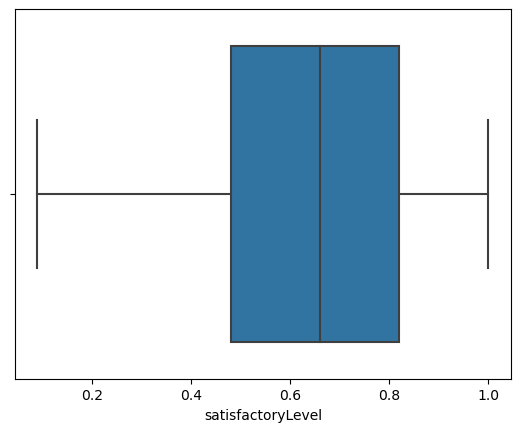

In [56]:
sns.boxplot(hr_data1['satisfactoryLevel'])

<AxesSubplot:xlabel='lastEvaluation'>

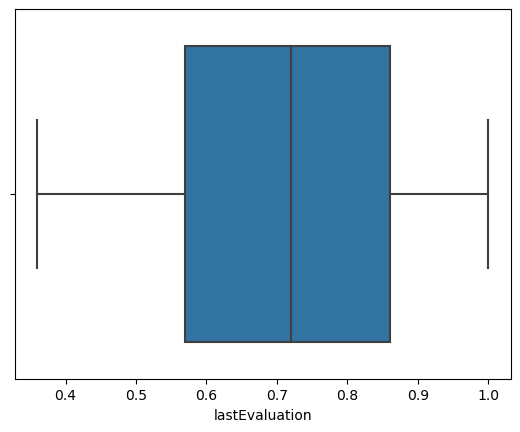

In [57]:
sns.boxplot(hr_data1['lastEvaluation'])

<AxesSubplot:xlabel='numberOfProjects'>

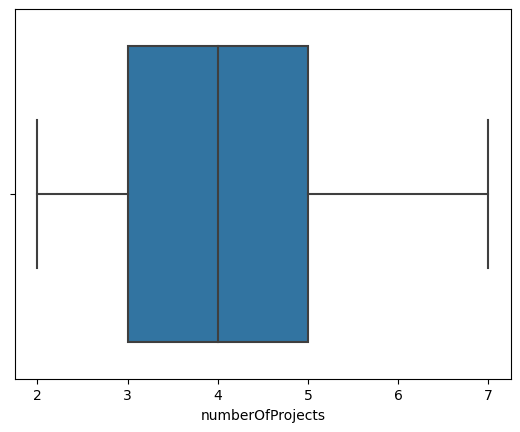

In [58]:
sns.boxplot(hr_data1['numberOfProjects'])

<AxesSubplot:xlabel='avgMonthlyHours'>

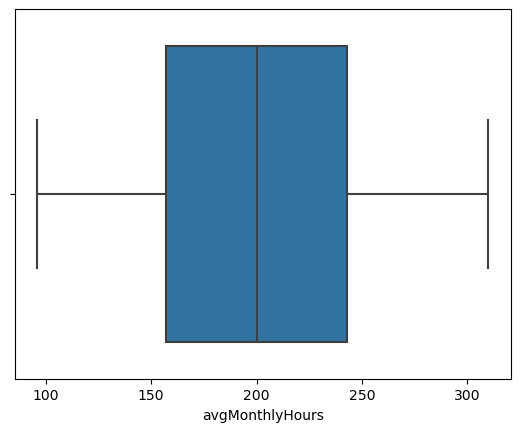

In [59]:
sns.boxplot(hr_data1['avgMonthlyHours'])

<AxesSubplot:xlabel='timeSpent.company2'>

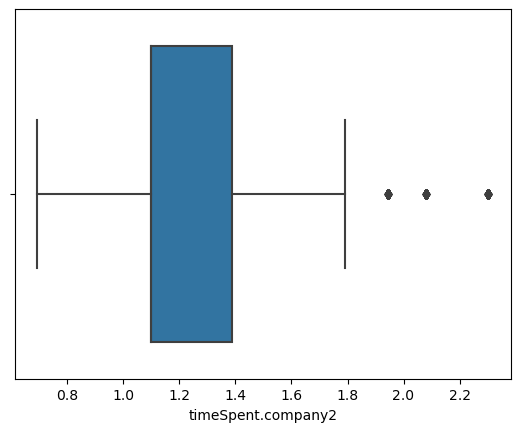

In [60]:
sns.boxplot(hr_data1['timeSpent.company2'])

<AxesSubplot:xlabel='workAccident'>

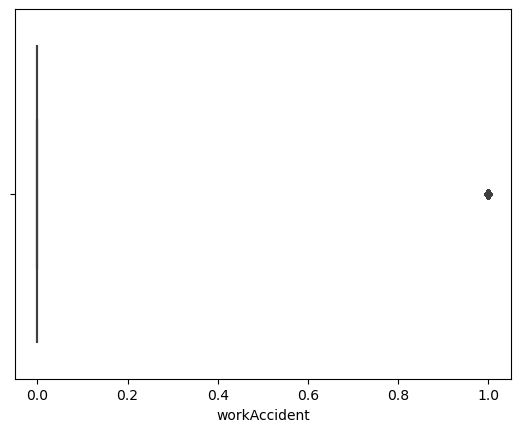

In [61]:
sns.boxplot(hr_data1['workAccident'])

<AxesSubplot:xlabel='left'>

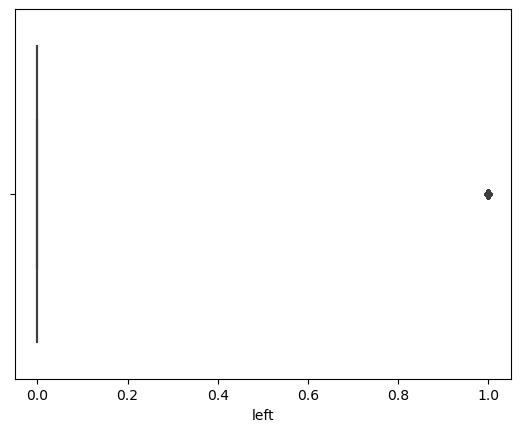

In [62]:
sns.boxplot(hr_data1['left'])

<AxesSubplot:xlabel='promotionInLast5years'>

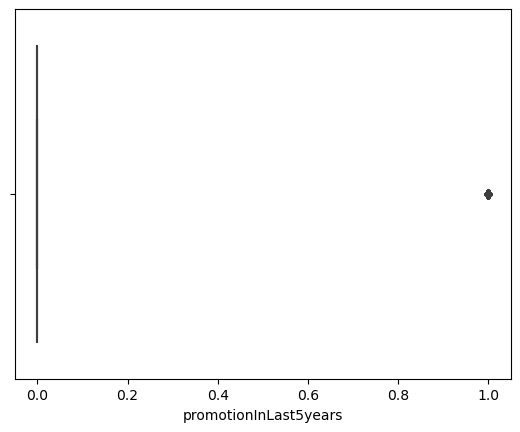

In [63]:
sns.boxplot(hr_data1['promotionInLast5years'])

From the above Transformations, we can the infer the following:
    
    
1. For the columns 'satisfactoryLevel', 'lastEvaluation', 'numberOfProjects' & 'avgMonthlyHours' there are no Outliers


2. For 'timeSpent.company2' there are Outliers present

since the timeSpent.company2 column denotes the duration an employee associated with the organisation, clipping the Outlier will cause data loss,wherein data is essential and relevant

# Normalization of Data

Data is Normalized using Min-Max Scaler.

Since the data does not have too many outliers Robust Scaler is not used. 

Also since the data has a few skewed columns Standard Scaler is not used

In [64]:
from sklearn.preprocessing import MinMaxScaler
mmsc=MinMaxScaler()
mmsc_data= mmsc.fit_transform(hr_data1)
mmsc_data=pd.DataFrame(mmsc_data)
mmsc_data.columns=hr_data1.columns
mmsc_data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company2,workAccident,left,promotionInLast5years
0,0.318681,0.265625,0.0,0.285047,0.251930,0.0,1.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.682606,0.0,1.0,0.0
2,0.021978,0.812500,1.0,0.822430,0.430677,0.0,1.0,0.0
3,0.307692,0.250000,0.0,0.294393,0.251930,0.0,1.0,0.0
4,0.351648,0.218750,0.0,0.266355,0.251930,0.0,1.0,0.0


# Correlation Matrix

In [65]:
Matrix= mmsc_data.corr()
Matrix

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company2,workAccident,left,promotionInLast5years
satisfactoryLevel,1.000000,0.095186,-0.133246,-0.006252,-0.187007,0.039940,-0.350558,0.019789
lastEvaluation,0.095186,1.000000,0.270256,0.264678,0.095715,-0.005695,0.013520,-0.007206
numberOfProjects,-0.133246,0.270256,1.000000,0.331516,0.201784,-0.005612,0.030928,-0.000544
avgMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.106296,-0.012860,0.070409,-0.004964
timeSpent.company2,-0.187007,0.095715,0.201784,0.106296,1.000000,-0.010988,0.226361,0.043355
workAccident,0.039940,-0.005695,-0.005612,-0.012860,-0.010988,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.226361,-0.125436,1.000000,-0.044657
promotionInLast5years,0.019789,-0.007206,-0.000544,-0.004964,0.043355,0.029852,-0.044657,1.000000


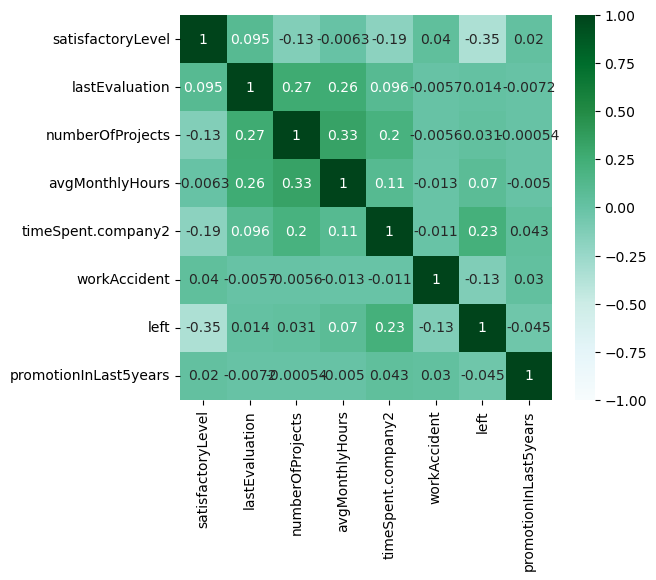

In [66]:
plt.figure(figsize=(6,5))
sns.heatmap(Matrix, cmap='BuGn', annot=True, vmax=1, vmin=-1)
plt.show()

We can't see much correlation among the attributes. Hence we will not drop any column.

# Training the Model

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [68]:
X=hr_data1[['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects','avgMonthlyHours', 'timeSpent.company2', 'workAccident','promotionInLast5years']]
Y=hr_data1[['left']]

In [69]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=0)

# 1) Using KNN Algorithm

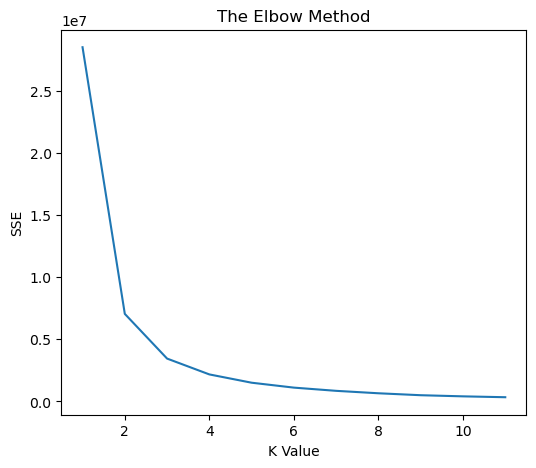

In [70]:
# Using the elbow method to find the optimal K value

ls = []
for i in range(1,12):
    km = KMeans(n_clusters=i)
    km.fit(X)
    ls.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = [6,5]
plt.plot(range(1,12),ls)
plt.title('The Elbow Method')
plt.xlabel('K Value')
plt.ylabel('SSE')
plt.show()

In [71]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [72]:
y_pred= knn.predict(x_test)
print("Accuracy Score: ",metrics.accuracy_score(y_pred,y_test))

Accuracy Score:  0.9399749895789913


In [73]:
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Confusion Matrix: 
[[1922   85]
 [  59  333]]


<AxesSubplot:>

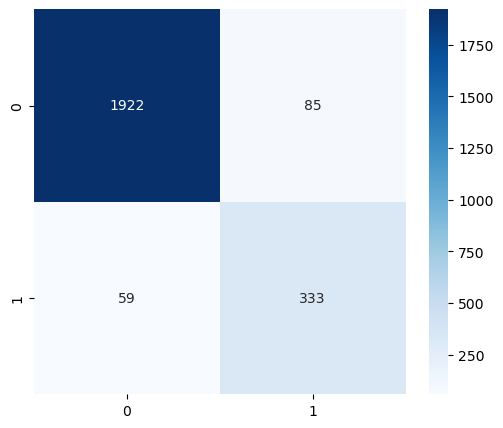

In [74]:
sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

In [75]:
fpr,tpr,threshold= metrics.roc_curve(y_test,y_pred)  
roc_auc= metrics.auc(fpr,tpr)
print("Area under the curve: ",roc_auc)

Area under the curve:  0.9035690135545997


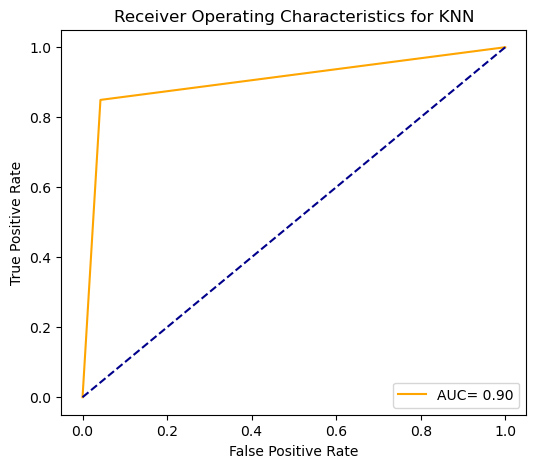

In [76]:
plt.title("Receiver Operating Characteristics for KNN")
plt.plot(fpr,tpr,'orange',label= "AUC= %0.2f" % roc_auc)
plt.legend(loc= 'lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 2) Using Logistic Regression

In [77]:
LogReg= LogisticRegression()
LogReg= LogReg.fit(x_train,y_train)
print('Coeff: ',LogReg.coef_)
print('Intercept: ',LogReg.intercept_) 

Coeff:  [[-3.61215167e+00  6.18808004e-01 -2.83074284e-01  3.59350109e-03
   1.59894217e+00 -1.35045605e+00 -1.51033682e+00]]
Intercept:  [-1.47539637]


In [78]:
y_pred= LogReg.predict(x_test)
print("Accuracy Score: ",metrics.accuracy_score(y_pred,y_test))

Accuracy Score:  0.8411838265944144


In [79]:
cm1= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm1,sep='\n')

Confusion Matrix: 
[[1934   73]
 [ 308   84]]


<AxesSubplot:>

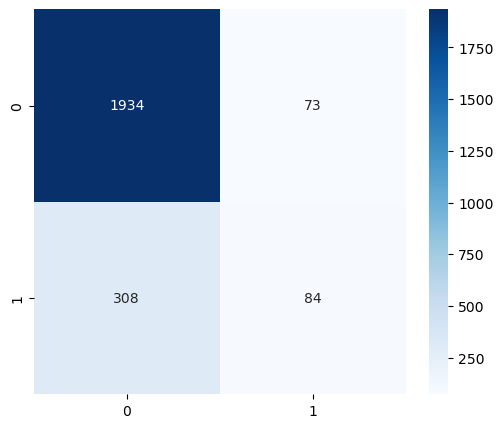

In [80]:
sns.heatmap(cm1,annot=True,cmap='Blues', fmt='g')

In [81]:
probs= LogReg.predict_proba(x_test)

prob_positive= probs[:,1]
fpr,tpr,threshold= metrics.roc_curve(y_test,prob_positive)  
roc_auc= metrics.auc(fpr,tpr)
print("Area under the curve: ",roc_auc)

Area under the curve:  0.8511993736208983


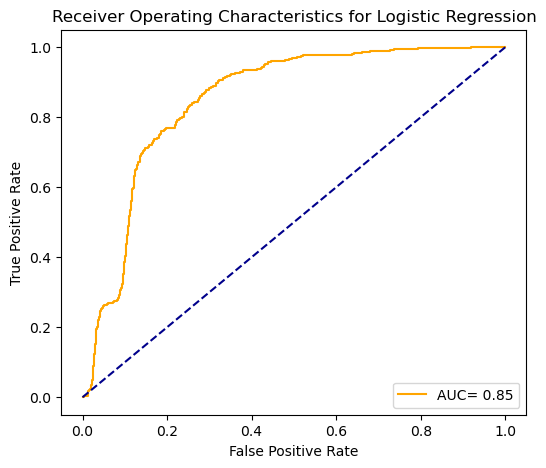

In [82]:
#Plotting ROC curve
plt.title("Receiver Operating Characteristics for Logistic Regression")
plt.plot(fpr,tpr,'orange',label= "AUC= %0.2f" % roc_auc)
plt.legend(loc= 'lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 3) Using Decision Tree

In [83]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [84]:
y_pred= clf.predict(x_test)
print("Accuracy Score: ",metrics.accuracy_score(y_pred,y_test))

Accuracy Score:  0.9670696123384743


In [85]:
cm2= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm2,sep='\n')

Confusion Matrix: 
[[1959   48]
 [  31  361]]


<AxesSubplot:>

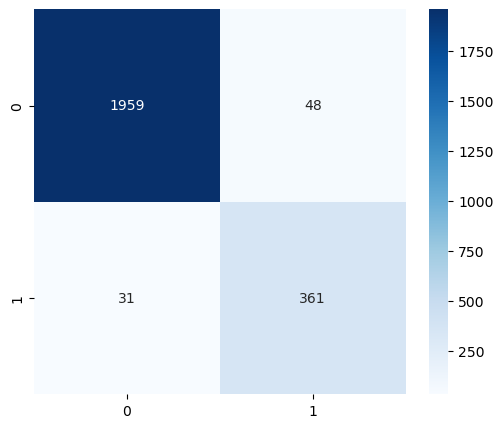

In [95]:
sns.heatmap(cm2,annot=True,cmap='Blues', fmt='g')

In [87]:
fpr,tpr,threshold= metrics.roc_curve(y_test,y_pred)  
roc_auc= metrics.auc(fpr,tpr)
print("Area under the curve: ",roc_auc)

Area under the curve:  0.9485010371861748


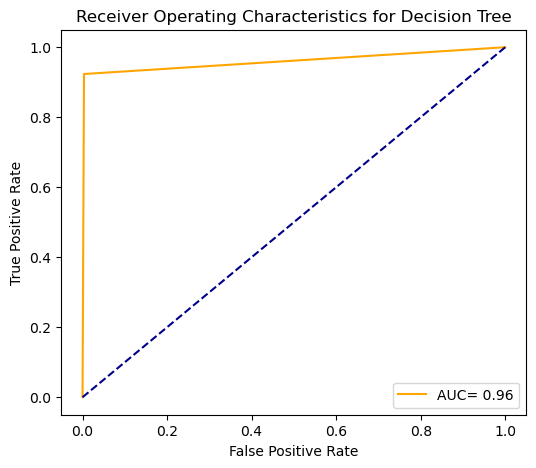

In [104]:
plt.title("Receiver Operating Characteristics for Decision Tree")
plt.plot(fpr,tpr,'orange',label= "AUC= %0.2f" % roc_auc)
plt.legend(loc= 'lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 4) Using Random Forest

In [96]:
rf= RandomForestClassifier(n_estimators=100,random_state=0)  
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [97]:
y_pred= rf.predict(x_test)
print("Accuracy Score RandomForest: ",metrics.accuracy_score(y_test,y_pred))

Accuracy Score RandomForest:  0.9845769070446019


In [98]:
cm3= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm3,sep='\n')

Confusion Matrix: 
[[2000    7]
 [  30  362]]


<AxesSubplot:>

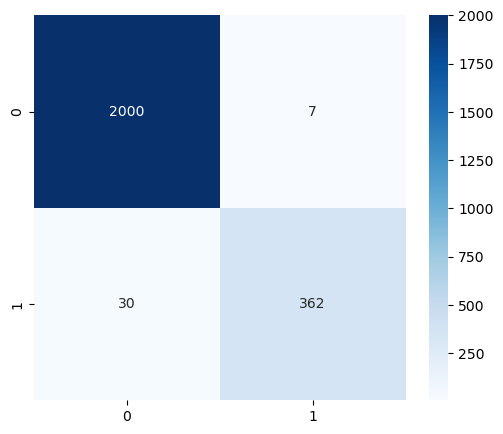

In [99]:
sns.heatmap(cm3,annot=True,cmap='Blues', fmt='g')

In [100]:
fpr,tpr,threshold= metrics.roc_curve(y_test,y_pred)  
roc_auc= metrics.auc(fpr,tpr)
print("Area under the curve: ",roc_auc)

Area under the curve:  0.9599907975148206


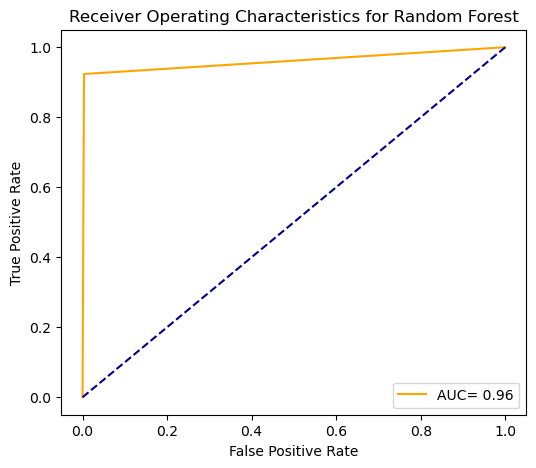

In [101]:
plt.title("Receiver Operating Characteristics for Random Forest")
plt.plot(fpr,tpr,'orange',label= "AUC= %0.2f" % roc_auc)
plt.legend(loc= 'lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

On Comparing the performance of algorithms,


The Highest Accuracy of 0.9845 with AUC 0.96 for this dataset is obtained for Random Forest Algorithm.